<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone: Model_Eval_Conclusion

## Contents:
- [Import Data](#import)
- [Modelling with Data Visualisation](#model-visual)
  - [Train Test Split](#train-test-split)
  - [Baseline](#base)
  - [Random Forest](#rf)
  - [SVC](#svm)
  - [AdaBoost](#ada)
  - [XGBoost Classifier](#xgboost)
- [Evaluation](#eval)
  - [F1 score](#f1-score)
  - [Precision-Recall score](#prec-recall)
  - [Train and Test Accuracy](#accuracy)
  - [Models Comparison](#models)
  - [Chosen Model Hyperparameters](#chosen)
- [Conclusion and Recommendations](#conclusion-rec)

**Note: This particular file was created and ran on Google Colab. If required to run on a different platform, do change the file paths accordingly**

<a name='import'></a>
## Import Data

### Import Necessary Libraries

In [ ]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import time to check for time elapsed since running
from time import time

#modelling purposes
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support as score

#mount google drive to pull files
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import Dataset

In [ ]:
data_final = pd.read_csv('gdrive/MyDrive/Colab Notebooks/GA-dsi23-capstone/data/data_final.csv')

data_final.head()

,age,ejection_fraction,serum_creatine,time,death_event
0,75.0,20,1.9,4,1
1,55.0,38,1.1,6,1
2,65.0,20,1.3,7,1
3,50.0,20,1.9,7,1
4,65.0,20,2.7,8,1


<a name='model-visual'></a>
## Modelling with Data Visualisation

We will run the following models for this project:

- [Logistic Regression](#base) --> Baseline model
- [Random Forest](#rf)
- [SVM](#svm)
- [Adaboost (with Decision Tree)](#ada)
- [XGBoost Classifier](#xgboost)

For model evaluation, the best model will be chosen by comparing the following metrics:
- Train-Test Accuracies (check for overfitting/underfitting)
- F1 score
- Precision-Recall score

The metrics will be further discussed in detail under [Evaluation](#eval) once we have collated all the required scores from all the models.

<a name='train-test-split'></a>
### Train Test Split

In [ ]:
#save needed features into X and the target into y
X = data_final.drop(columns='death_event')
y = data_final['death_event']

print('X:\n', X.head())
print('\ny:\n', y.head())

X:
     age  ejection_fraction  serum_creatine  time
0  75.0                 20             1.9     4
1  55.0                 38             1.1     6
2  65.0                 20             1.3     7
3  50.0                 20             1.9     7
4  65.0                 20             2.7     8

y:
 0    1
1    1
2    1
3    1
4    1
Name: death_event, dtype: int64


In [ ]:
#train test split data and stratify to ensure same proportions of each class
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

#scale variables in X to ensure same scale
ss = StandardScaler()
X_train_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)

<a name='base'></a>
### Baseline

For the Baseline, we will run Logistic Regression with default parameters.

In [ ]:
#instantiate logistic regression for baseline model
base = LogisticRegression()

#fit model to training data
base.fit(X_train_scale, y_train)

#predict classification using model
base_ypred = base.predict(X_test_scale)

#get train and test accuracy score of baseline
base_train_acc = base.score(X_train_scale, y_train).round(3)
base_test_acc = base.score(X_test_scale, y_test).round(3)
print('Baseline Train Accuracy:', base_train_acc)
print('Baseline Test Accuracy:', base_test_acc)

#get classification report for y_pred compared to y_test
base_report = classification_report(y_test, base_ypred)
print('\nBaseline Classification Report:\n', base_report)


Baseline Train Accuracy: 0.82
Baseline Test Accuracy: 0.833

Baseline Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.76      0.68      0.72        19

    accuracy                           0.83        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.83      0.83      0.83        60



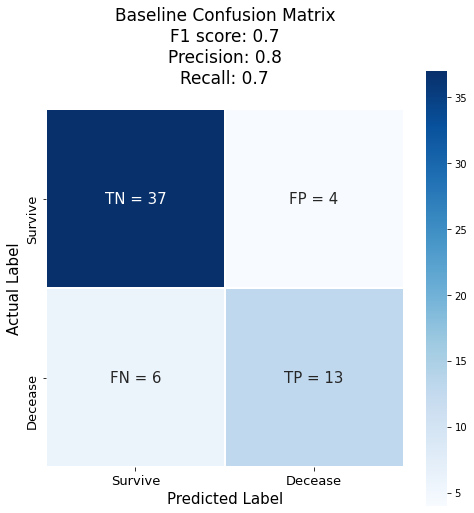

In [ ]:
#confusion matrix of baseline model
base_cmatrix = confusion_matrix(y_test, base_ypred)

#pulling individual classification report scores
#each of these variables will return 2 values, 1 for each class --> the one we want is index 1 (predicted death by heart failure)
base_prec, base_recall, base_f1, base_supp = score(y_test, base_ypred)

#setting visualisations for confusion matrix
base_cmatrix_vis = []
for index, value in enumerate(base_cmatrix):
  if index == 0:
    base_cmatrix_vis.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
  if index == 1:
    base_cmatrix_vis.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])

#plot confusion matrix
plt.figure(figsize=(8, 8));

sns.heatmap(base_cmatrix, annot=np.array(base_cmatrix_vis), fmt='', 
            annot_kws={'size': 15}, linewidths=0.5, square=True, cmap='Blues', 
            xticklabels = ['Survive', 'Decease'], 
            yticklabels = ['Survive', 'Decease']
            );

plt.xlabel('Predicted Label', fontsize=15);
plt.ylabel('Actual Label', fontsize=15);
plt.title('Baseline Confusion Matrix\n' + 
          'F1 score: {:.1f}'.format(base_f1[1]) + 
          '\nPrecision: {:.1f}'.format(base_prec[1]) + 
          '\nRecall: {:.1f}'.format(base_recall[1]) + '\n', 
          size=17
          );
plt.tick_params(labelsize=13);

plt.savefig('gdrive/MyDrive/Colab Notebooks/GA-dsi23-capstone/plots/base_confusion', bbox_inches="tight", dpi=300)

plt.show();

The Baseline model sees higher Train Accuracy than test Accuracy, signifying that it is overfitted.

Precision score of the model is at 0.71 and Recall score of the model is at 0.69.
The weighted average of the Precision-Recall score, the F1 score, is 0.70 which indicates that the model is moderately good in performance.

We will proceed to run different models with tuned hyperparameters to see if any of the models are able to beat this baseline.

<a name='rf'></a>
### Random Forest

In [ ]:
#run start time in seconds
start = time()

# instantiate random forest
rf = RandomForestClassifier()

# list of params to run through randomizedsearchcv
rf_params = {'n_estimators': [int(value) for value in np.linspace(start=100, stop=500, num=10)], 
             'max_depth': [int(value) for value in np.linspace(start=10, stop=200, num=10)]
             }

# instantiate randomizedsearchcv
random_rf = RandomizedSearchCV(rf, param_distributions=rf_params, cv=5, n_iter=100, n_jobs=-1)

# fit the data into randomizedsearchcv
random_rf.fit(X_train_scale, y_train)

# amount of time taken to run in seconds
time_taken = time() - start
print('Time taken to run:', round(time_taken, 2), 'seconds')


Time taken to run: 186.41 seconds


In [ ]:
# The best params to used for the model
random_rf_best = random_rf.best_params_

print('Best Parameters:', random_rf_best)

Best Parameters: {'n_estimators': 188, 'max_depth': 94}


The optimal hyperparameters found for Random Forest are:
- n_estimators = 188
- max_depth = 94

We will run the model once again with the optimised values and pull out the required scores for evaluation and data visualisation.

In [ ]:
#instantiate random forest model
rf_optimal = RandomForestClassifier(n_estimators=188, max_depth=94)

#fit model to training data
rf_optimal.fit(X_train_scale, y_train)

#print model name to ensure it is working
print(rf_optimal)

#predict classification using model
rf_ypred = rf_optimal.predict(X_test_scale)

#get train and test accuracy score of random forest through cross validation with cv=5
rf_train_acc = cross_val_score(rf_optimal, X_train_scale, y_train, cv=5).mean().round(3)
rf_test_acc = cross_val_score(rf_optimal, X_test_scale, y_test, cv=5).mean().round(3)
print('\nRandom Forest Train Accuracy:', rf_train_acc)
print('Random Forest Test Accuracy:', rf_test_acc)

#get classification report for y_pred compared to y_test
rf_report = classification_report(y_test, rf_ypred)
print('\nRandom Forest Classification Report:\n', rf_report)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=94, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=188,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Random Forest Train Accuracy: 0.795
Random Forest Test Accuracy: 0.783

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        41
           1       0.76      0.84      0.80        19

    accuracy                           0.87        60
   macro avg       0.84      0.86      0.85        60
weighted avg       0.87      0.87      0.87        60



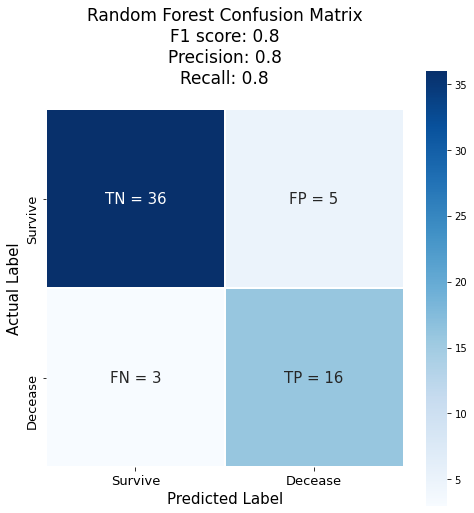

In [ ]:
#confusion matrix of random forest model
rf_cmatrix = confusion_matrix(y_test, rf_ypred)

#pulling individual classification report scores
#each of these variables will return 2 values, 1 for each class --> the one we want is index 1 (predicted death by heart failure)
rf_prec, rf_recall, rf_f1, rf_supp = score(y_test, rf_ypred)

#setting visualisations for confusion matrix
rf_cmatrix_vis = []
for index, value in enumerate(rf_cmatrix):
  if index == 0:
    rf_cmatrix_vis.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
  if index == 1:
    rf_cmatrix_vis.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])

#plot confusion matrix
plt.figure(figsize=(8, 8));

sns.heatmap(rf_cmatrix, annot=np.array(rf_cmatrix_vis), fmt='', 
            annot_kws={'size': 15}, linewidths=0.5, square=True, cmap='Blues', 
            xticklabels = ['Survive', 'Decease'], 
            yticklabels = ['Survive', 'Decease']
            );

plt.xlabel('Predicted Label', fontsize=15);
plt.ylabel('Actual Label', fontsize=15);
plt.title('Random Forest Confusion Matrix\n' + 
          'F1 score: {:.1f}'.format(rf_f1[1]) + 
          '\nPrecision: {:.1f}'.format(rf_prec[1]) + 
          '\nRecall: {:.1f}'.format(rf_recall[1]) + '\n', 
          size=17
          );
plt.tick_params(labelsize=13);

plt.savefig('gdrive/MyDrive/Colab Notebooks/GA-dsi23-capstone/plots/rf_confusion', bbox_inches="tight", dpi=300)

plt.show();

<a name='svm'></a>
### SVC

In [ ]:
#run start time in seconds
start = time()

# instantiate svm
svm = SVC()

# list of params to run through randomizedsearchcv
svm_params = {'C': [value.round(3) for value in np.linspace(start=0.0001, stop=5, num=100)], 
              'kernel': ['linear', 'poly', 'rbf'],
              'gamma': [value.round(3) for value in np.linspace(start=0.0001, stop=1, num=100)]
              }

# instantiate randomizedsearchcv
random_svm = RandomizedSearchCV(svm, param_distributions=svm_params, n_iter=100, cv=5, n_jobs=-1)

# Fit the data into randomizedsearchcv
random_svm.fit(X_train_scale, y_train)

# amount of time taken to run in seconds
time_taken = time() - start
print('Time taken to run:', round(time_taken, 2), 'seconds')


Time taken to run: 1.94 seconds


In [ ]:
# The best params to used for the model
random_svm_best = random_svm.best_params_

print('Best Parameters:', random_svm_best)

Best Parameters: {'kernel': 'linear', 'gamma': 0.687, 'C': 1.212}


The optimal hyperparameters found for SVM are:
- kernel = 'linear'
- gamma = 0.687
- C = 1.212

We will run the model once again with the optimised values and pull out the required scores for evaluation and data visualisation.

In [ ]:
#instantiate svm
svm_optimal = SVC(kernel='linear', gamma=0.687, C=1.212)

#fit model to training data
svm_optimal.fit(X_train_scale, y_train)

#print model name to ensure it is working
print(svm_optimal)

#predict classification using model
svm_ypred = svm_optimal.predict(X_test_scale)

#get train and test accuracy score of svm through cross validation with cv=5
svm_train_acc = cross_val_score(svm_optimal, X_train_scale, y_train, cv=5).mean().round(3)
svm_test_acc = cross_val_score(svm_optimal, X_test_scale, y_test, cv=5).mean().round(3)
print('\nSVM Train Accuracy:', svm_train_acc)
print('SVM Forest Test Accuracy:', svm_test_acc)

#get classification report for y_pred compared to y_test
svm_report = classification_report(y_test, svm_ypred)
print('\nSVM Classification Report:\n', svm_report)

SVC(C=1.212, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.687, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVM Train Accuracy: 0.816
SVM Forest Test Accuracy: 0.85

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



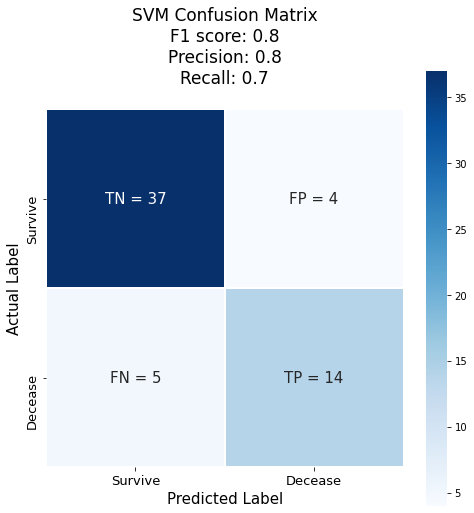

In [ ]:
#confusion matrix of svm model
svm_cmatrix = confusion_matrix(y_test, svm_ypred)

#pulling individual classification report scores
#each of these variables will return 2 values, 1 for each class --> the one we want is index 1 (predicted death by heart failure)
svm_prec, svm_recall, svm_f1, svm_supp = score(y_test, svm_ypred)

#setting visualisations for confusion matrix
svm_cmatrix_vis = []
for index, value in enumerate(svm_cmatrix):
  if index == 0:
    svm_cmatrix_vis.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
  if index == 1:
    svm_cmatrix_vis.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])

#plot confusion matrix
plt.figure(figsize=(8, 8));

sns.heatmap(svm_cmatrix, annot=np.array(svm_cmatrix_vis), fmt='', 
            annot_kws={'size': 15}, linewidths=0.5, square=True, cmap='Blues', 
            xticklabels = ['Survive', 'Decease'], 
            yticklabels = ['Survive', 'Decease']
            );

plt.xlabel('Predicted Label', fontsize=15);
plt.ylabel('Actual Label', fontsize=15);
plt.title('SVM Confusion Matrix\n' + 
          'F1 score: {:.1f}'.format(svm_f1[1]) + 
          '\nPrecision: {:.1f}'.format(svm_prec[1]) + 
          '\nRecall: {:.1f}'.format(svm_recall[1]) + '\n', 
          size=17
          );
plt.tick_params(labelsize=13);

plt.savefig('gdrive/MyDrive/Colab Notebooks/GA-dsi23-capstone/plots/svm_confusion', bbox_inches="tight", dpi=300)

plt.show();

<a name='ada'></a>
### AdaBoost (with Decision Tree)

In [ ]:
#run start time in seconds
start = time()

# instantiate adaboost
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# list of params to run through randomizedsearchcv
ada_params = {'n_estimators': [int(value) for value in np.linspace(start=2, stop=100, num=10)], 
              'learning_rate': [value.round(3) for value in np.linspace(start=0.0, stop=1.0, num=10)]
              }

# instantiate randomizedsearchcv
random_ada = RandomizedSearchCV(ada, param_distributions=ada_params, n_iter=100, cv=5, n_jobs=-1)

# Fit the data into randomizedsearchcv
random_ada.fit(X_train_scale, y_train)

# amount of time taken to run in seconds
time_taken = time() - start
print('Time taken to run:', round(time_taken, 2), 'seconds')


Time taken to run: 1.38 seconds


In [ ]:
# The best params to used for the model
random_ada_best = random_ada.best_params_

print('Best Parameters:', random_ada_best)

Best Parameters: {'n_estimators': 23, 'learning_rate': 0.111}


The optimal hyperparameters found for AdaBoost are:
- n_estimators = 23
- learning_rate = 0.111

We will run the model once again with the optimised values and pull out the required scores for evaluation and data visualisation.

In [ ]:
#instantiate adaboost
ada_optimal = AdaBoostClassifier(n_estimators=23, 
                                 learning_rate=0.111
                                 )

#fit model to training data
ada_optimal.fit(X_train_scale, y_train)

#print model name to ensure it is working
print(ada_optimal)

#predict classification using model
ada_ypred = ada_optimal.predict(X_test_scale)

#get train and test accuracy score of adaboost through cross validation with cv=5
ada_train_acc = cross_val_score(ada_optimal, X_train_scale, y_train, cv=5).mean().round(3)
ada_test_acc = cross_val_score(ada_optimal, X_test_scale, y_test, cv=5).mean().round(3)
print('\nAdaBoost Train Accuracy:', ada_train_acc)
print('AdaBoost Test Accuracy:', ada_test_acc)

#get classification report for y_pred compared to y_test
ada_report = classification_report(y_test, ada_ypred)
print('\nAdaBoost Classification Report:\n', ada_report)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.111, n_estimators=23, random_state=None)

AdaBoost Train Accuracy: 0.849
AdaBoost Test Accuracy: 0.733

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60



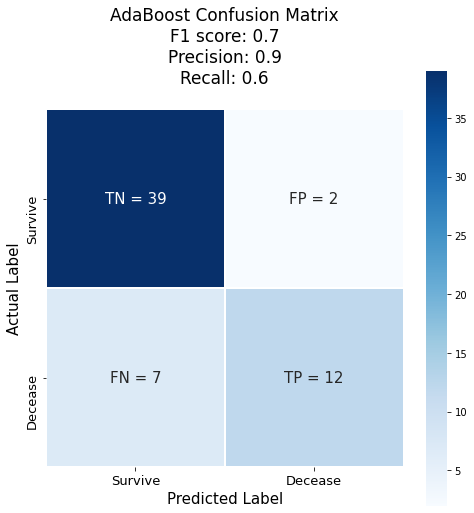

In [ ]:
#confusion matrix of adaboost model
ada_cmatrix = confusion_matrix(y_test, ada_ypred)

#pulling individual classification report scores
#each of these variables will return 2 values, 1 for each class --> the one we want is index 1 (predicted death by heart failure)
ada_prec, ada_recall, ada_f1, ada_supp = score(y_test, ada_ypred)

#setting visualisations for confusion matrix
ada_cmatrix_vis = []
for index, value in enumerate(ada_cmatrix):
  if index == 0:
    ada_cmatrix_vis.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
  if index == 1:
    ada_cmatrix_vis.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])

#plot confusion matrix
plt.figure(figsize=(8, 8));

sns.heatmap(ada_cmatrix, annot=np.array(ada_cmatrix_vis), fmt='', 
            annot_kws={'size': 15}, linewidths=0.5, square=True, cmap='Blues', 
            xticklabels = ['Survive', 'Decease'], 
            yticklabels = ['Survive', 'Decease']
            );

plt.xlabel('Predicted Label', fontsize=15);
plt.ylabel('Actual Label', fontsize=15);
plt.title('AdaBoost Confusion Matrix\n' + 
          'F1 score: {:.1f}'.format(ada_f1[1]) + 
          '\nPrecision: {:.1f}'.format(ada_prec[1]) + 
          '\nRecall: {:.1f}'.format(ada_recall[1]) + '\n', 
          size=17
          );
plt.tick_params(labelsize=13);

plt.savefig('gdrive/MyDrive/Colab Notebooks/GA-dsi23-capstone/plots/ada_confusion', bbox_inches="tight", dpi=300)

plt.show();

<a name='xgboost'></a>
### XGBoost Classifier

In [ ]:
#run start time in seconds
start = time()

# instantiate adaboost
xgb = XGBClassifier()

# list of params to run through randomizedsearchcv
xgb_params = {'max_depth': [int(value) for value in np.linspace(start=1, stop=50, num=100)], 
              'subsample': [value.round(3) for value in np.linspace(start=0.1, stop=0.8, num=10)], 
              'n_estimator': [int(value) for value in np.linspace(start=2, stop=50, num=100)]
              }

# instantiate randomizedsearchcv
random_xgb = RandomizedSearchCV(xgb, param_distributions=xgb_params, n_iter=100, cv=5, n_jobs=-1)

# Fit the data into randomizedsearchcv
random_xgb.fit(X_train_scale, y_train)

# amount of time taken to run in seconds
time_taken = time() - start
print('Time taken to run:', round(time_taken, 2), 'seconds')

Time taken to run: 7.53 seconds


In [ ]:
# The best params to used for the model
random_xgb_best = random_xgb.best_params_

print('Best Parameters:', random_xgb_best)

Best Parameters: {'subsample': 0.256, 'n_estimator': 24, 'max_depth': 4}


The optimal hyperparameters found for XGBoost are:
- n_estimator = 24
- max_depth = 4
- subsample = 0.256

We will run the model once again with the optimised values and pull out the required scores for evaluation and data visualisation.

In [ ]:
#instantiate xgboost
xgb_optimal = XGBClassifier(max_depth=4, subsample=0.256, n_estimator=24)

#fit model to training data
xgb_optimal.fit(X_train_scale, y_train)

#print model name to ensure it is working
print(xgb_optimal)

#predict classification using model
xgb_ypred = xgb_optimal.predict(X_test_scale)

#get train and test accuracy score of xgboost through cross validation with cv=5
xgb_train_acc = cross_val_score(xgb_optimal, X_train_scale, y_train, cv=5).mean().round(3)
xgb_test_acc = cross_val_score(xgb_optimal, X_test_scale, y_test, cv=5).mean().round(3)
print('\nXGBoost Train Accuracy:', xgb_train_acc)
print('XGBoost Test Accuracy:', xgb_test_acc)

#get classification report for y_pred compared to y_test
xgb_report = classification_report(y_test, xgb_ypred)
print('\nXGBoost Classification Report:\n', xgb_report)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimator=24,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.256, verbosity=1)

XGBoost Train Accuracy: 0.862
XGBoost Test Accuracy: 0.833

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91        41
           1       0.80      0.84      0.82        19

    accuracy                           0.88        60
   macro avg       0.86      0.87      0.87        60
weighted avg       0.89      0.88      0.88        60



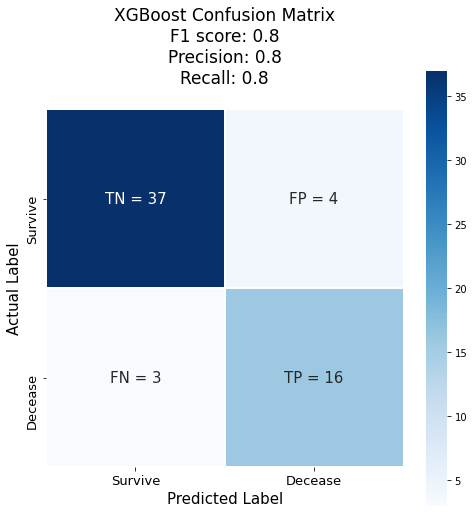

In [ ]:
#confusion matrix of xgboost model
xgb_cmatrix = confusion_matrix(y_test, xgb_ypred)

#pulling individual classification report scores
#each of these variables will return 2 values, 1 for each class --> the one we want is index 1 (predicted death by heart failure)
xgb_prec, xgb_recall, xgb_f1, xgb_supp = score(y_test, xgb_ypred)

#setting visualisations for confusion matrix
xgb_cmatrix_vis = []
for index, value in enumerate(xgb_cmatrix):
  if index == 0:
    xgb_cmatrix_vis.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
  if index == 1:
    xgb_cmatrix_vis.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])

#plot confusion matrix
plt.figure(figsize=(8, 8));

sns.heatmap(xgb_cmatrix, annot=np.array(xgb_cmatrix_vis), fmt='', 
            annot_kws={'size': 15}, linewidths=0.5, square=True, cmap='Blues', 
            xticklabels = ['Survive', 'Decease'], 
            yticklabels = ['Survive', 'Decease']
            );

plt.xlabel('Predicted Label', fontsize=15);
plt.ylabel('Actual Label', fontsize=15);
plt.title('XGBoost Confusion Matrix\n' + 
          'F1 score: {:.1f}'.format(xgb_f1[1]) + 
          '\nPrecision: {:.1f}'.format(xgb_prec[1]) + 
          '\nRecall: {:.1f}'.format(xgb_recall[1]) + '\n', 
          size=17
          );
plt.tick_params(labelsize=13);

plt.savefig('gdrive/MyDrive/Colab Notebooks/GA-dsi23-capstone/plots/xgboost_confusion', bbox_inches="tight", dpi=300)

plt.show();

<a name='eval'></a>
## Evaluation

Recall that the classification of survival due to heart failure is classified as such:

|Heart Failure Survival|Numerical Value in Dataframes|Class|
|:---:|:---:|:---:|
|**Decease**|1|Positive|
|**Survive**|0|Negative|

The following are the metrics that we will use to decide the best model, in the same priority:
1. F1 score
2. Precision-Recall score
3. Train-Test Accuracies (check for overfitting/underfitting)

<a name='f1-score'></a>
### F1 score

$$F1 score  =  2 * \frac{\text{Precision * Recall}}{\text{Precision + Recall}}$$

The F1 score is the weighted average of the Precision-Recall scores. It is used for evaluation on a binary classification system and is a way to measure the model's accuracy on the dataset [(source)](https://deepai.org/machine-learning-glossary-and-terms/f-score). 

It is used to give a better perspective of which model performs the best. 

An F1 score of 0 means the model is as bad as it can get and a score of 1 means the model is perfect. **When comparing the F1 score, we want it to be as high as possible.**

<a name='prec-recall'></a>

### Precision-Recall score

$$Precision = \frac{\text{True Positives}}{\text{True Positives + False Positives}}$$

**Precision** is the ratio of True Positives to All Predicted Positives. It means that of all the Positive predictions made by the model, what percentage of this is actually correct.

Put simply in the context of this project, the higher the Precision score, the higher the number of patients that are predicted as deceased from heart failure actually did pass away.



$$Recall = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$

**Recall** is the ratio of True Positives to All Actual Positives. It shows the percentage of correctly classified Positive predictions by the model against all the positives in the dataset.

Put simply in the context of this project, the higher the Recall score, the higher the number of patients who actually passed away from heart failure are correctly predicted by the model as deceased.

<br>

*Depending on the threshold that we set and the prediction that we want to priotitise, the will usually be a trade-off between the Precision and Recall scores. For this project, we prefer to predict that a higher number of patients be be 'deceased' from heart failure (which will increase the number of False Positives) to be on the safe side. This is due to the fact that the opposite of this (i.e. predicting that more patients will survive) might lead to lesser attention and resources allocated to those patients who are predicted as 'survive', which may be fatal.*

**Therefore, if there is a need to choose between models with similar F1 scores, the model that has higher Recall score, even at the expense of lower Precision score, will be preferred.** This will help to reduce the chances of potentially fatal misclassifications of patients surviving (which means we want to reduce the number of False Negatives while increasing the number of False Positives).

<a name='accuracy'></a>

### Train and Test Accuracy

$$Accuracy = \frac{\text{True Positives + True Negatives}}{\text{Total Predictions}}$$

The dataset used in this project is imbalanced. Therefore, we will not use the Accuracy score as the main evaluation in deciding the best model.

The reason for not using the Accuracy score as the main evaluation with an imbalanced dataset is because most models are designed with the assumption that the datasets to be used are balanced [(source)](https://machinelearningmastery.com/failure-of-accuracy-for-imbalanced-class-distributions/). 

The Accuracy score gives an overview of the model's prediction accuracy of both majority and minority class combined. 

With an imbalanced dataset, the model might be more proficient in classifying the majority class over the minority class since it would be better trained on the majority class due to having more data. The Accuracy score returned might then be misleading and potentially mask the model's inability to correctly classify the minority class.

**As such, we will only use the Train and Test Accuracy within each model for comparison to check if the model is underfitted or overfitted.**

Train Accuracy < Test Accuracy -- signifies that the model is underfitted.

Train Accuracy > Test Accuracy -- signifies that the model is overfitted.

The bigger the difference between the Train and Test Accuracy, the more severe the underfitting/overfitting. Therefore, the Train and Test Accuracy should be should be as similar to each other as possible.

<a name='models'></a>

### Models Comparison




|Models|F1-score|Precision|Recall|Train Accuracy|Test Accuracy|
|:---:|:---:|:---:|:---:|:---:|:---:|
|**Baseline**|0.722|0.765|0.684|0.820|0.833|
|**Random Forest**|0.800|0.762|0.842|0.795|0.783|
|**SVM**|0.757|0.778|0.737|0.816|0.850|
|**AdaBoost**|0.727|0.857|0.631|0.849|0.733|
|**XGBoost**|**0.821**|0.800|**0.842**|0.862|0.833|

<br>

The models that we will choose should first be able to beat the Baseline in terms of F1 score. At a glance, we see that all our tuned models have higher F1 score than the Baseline. **Therefore, we can conclude that all the tuned models are able to beat our Baseline.**

Next, we compare between the models and pull out the model with the highest F1 score while not being severely underfitting/overfitting. **For this, we find that the XGBoost Classifier model fulfills this condition.**

**The XGBoost Classifier model has the highest F1 score**, which indicates that out of all the models tested, the XGBoost Classifier model has the highest accuracy on the dataset and performs best overall.

Looking more granularly into the scores, we find that **the XGBoost Classifier model has the highest value for the Recall score** out of all the models while also **maintaining a high value for its Precision score**. This means the model is very well rounded and does not sacrifice too much on Precision to get a high Recall, which is ideal.

As the Recall score of the XGBoost Classifier model is higher than its Precision score, it signifies that the model predicts more False Positives (predict more patients as deceased) and less False Negatives (predict more patients as survive), which works in our favour since it allows us to be on the safer side and reduce potentially fatal misclassifications.

Lastly, we compare the model's Train and Test Accuracy to check for underfitting/overfitting. The XGBoost Classifier model has a slightly higher Train Accuracy score than the Test Accuracy, indicating slight overfitting. However, the difference between the Train and Test Accuracy is approximately 0.03, which means the overfitting is not very severe and is tolerable as compared to the other models.

**Therefore, based on the comparison of the metrics, we choose to use the XGBoost Classifier model moving forward.**

In [ ]:
print('\nBaseline\n' + 'Precision:', base_prec[1], '\nRecall:', base_recall[1], 
      '\nF1 score:', base_f1[1], '\nTrain Accuracy:', base_train_acc, '\nTest Accuracy:', base_test_acc)

print('\nRandom Forest\n' + 'Precision:', rf_prec[1], '\nRecall:', rf_recall[1], 
      '\nF1 score:', rf_f1[1], '\nTrain Accuracy:', rf_train_acc, '\nTest Accuracy:', rf_test_acc)

print('\nSVM\n' + 'Precision:', svm_prec[1], '\nRecall:', svm_recall[1], 
      '\nF1 score:', svm_f1[1], '\nTrain Accuracy:', svm_train_acc, '\nTest Accuracy:', svm_test_acc)

print('\nAdaBoost\n' + 'Precision:', ada_prec[1], '\nRecall:', ada_recall[1], 
      '\nF1 score:', ada_f1[1], '\nTrain Accuracy:', ada_train_acc, '\nTest Accuracy:', ada_test_acc)

print('\nXGBoost\n' + 'Precision:', xgb_prec[1], '\nRecall:', xgb_recall[1], 
      '\nF1 score:', xgb_f1[1], '\nTrain Accuracy:', xgb_train_acc, '\nTest Accuracy:', xgb_test_acc)


Baseline
Precision: 0.7647058823529411 
Recall: 0.6842105263157895 
F1 score: 0.7222222222222222 
Train Accuracy: 0.82 
Test Accuracy: 0.833

Random Forest
Precision: 0.7619047619047619 
Recall: 0.8421052631578947 
F1 score: 0.8 
Train Accuracy: 0.795 
Test Accuracy: 0.783

SVM
Precision: 0.7777777777777778 
Recall: 0.7368421052631579 
F1 score: 0.7567567567567567 
Train Accuracy: 0.816 
Test Accuracy: 0.85

AdaBoost
Precision: 0.8571428571428571 
Recall: 0.631578947368421 
F1 score: 0.7272727272727273 
Train Accuracy: 0.849 
Test Accuracy: 0.733

XGBoost
Precision: 0.8 
Recall: 0.8421052631578947 
F1 score: 0.8205128205128205 
Train Accuracy: 0.862 
Test Accuracy: 0.833


In [ ]:
#create 4 variables to save the model names, f1 score, the recall score and the precision scores of every model for plotting later
models = ['Baseline', 'Random Forest', 'SVM', 'AdaBoost', 'XGBoost']
f1_all = [base_f1[1].round(3), rf_f1[1].round(3), svm_f1[1].round(3), ada_f1[1].round(3), xgb_f1[1].round(3)]
recall_all = [base_recall[1].round(3), rf_recall[1].round(3), svm_recall[1].round(3), ada_recall[1].round(3), xgb_recall[1].round(3)]
prec_all = [base_prec[1].round(3), rf_prec[1].round(3), svm_prec[1].round(3), ada_prec[1].round(3), xgb_prec[1].round(3)]


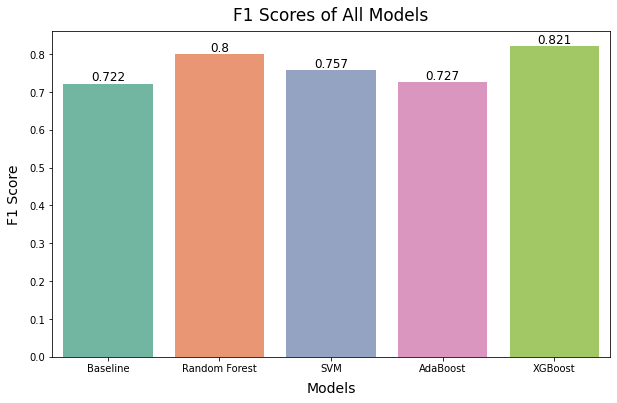

In [ ]:
#plotting barplots for f1 to show scores of each model for easier comparison
plt.rcParams['figure.figsize']=10,6
f1_all_plt = sns.barplot(x=models, y=f1_all, palette='Set2')

f1_all_plt.set_title('F1 Scores of All Models', fontsize=17, pad=10);
f1_all_plt.set_xlabel('Models', fontsize=14, labelpad=8);
f1_all_plt.set_ylabel('F1 Score', fontsize=14, labelpad=8);

#for loop to add in values above each bar
for values in f1_all_plt.patches:
  #pull width and height for each bar
  width, height = values.get_width(), values.get_height();
  
  #pull x and y value for each bar
  x, y = values.get_xy();
  
  #add in values for the bars and adjust position of each value
  f1_all_plt.annotate(s=height, xy=(x+width/2, y+height*1.01), ha='center', fontsize=12);

plt.savefig('gdrive/MyDrive/Colab Notebooks/GA-dsi23-capstone/plots/f1_all', bbox_inches="tight", dpi=300)

plt.show();

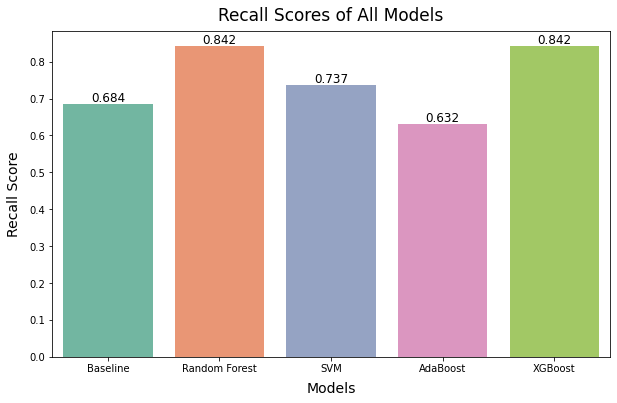

In [ ]:
#plotting barplots for recall to show scores of each model for easier comparison
plt.rcParams['figure.figsize']=10,6
recall_all_plt = sns.barplot(x=models, y=recall_all, palette='Set2')

recall_all_plt.set_title('Recall Scores of All Models', fontsize=17, pad=10);
recall_all_plt.set_xlabel('Models', fontsize=14, labelpad=8);
recall_all_plt.set_ylabel('Recall Score', fontsize=14, labelpad=8);

#for loop to add in values above each bar
for values in recall_all_plt.patches:
  #pull width and height for each bar
  width, height = values.get_width(), values.get_height();
  
  #pull x and y value for each bar
  x, y = values.get_xy();
  
  #add in values for the bars and adjust position of each value
  recall_all_plt.annotate(s=height, xy=(x+width/2, y+height*1.01), ha='center', fontsize=12);

plt.savefig('gdrive/MyDrive/Colab Notebooks/GA-dsi23-capstone/plots/recall_all', bbox_inches="tight", dpi=300)

plt.show();

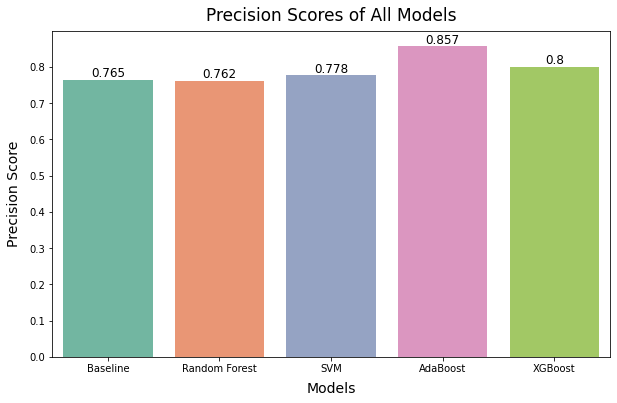

In [ ]:
#plotting barplots for precision to show scores of each model for easier comparison
plt.rcParams['figure.figsize']=10,6
prec_all_plt = sns.barplot(x=models, y=prec_all, palette='Set2')

prec_all_plt.set_title('Precision Scores of All Models', fontsize=17, pad=10);
prec_all_plt.set_xlabel('Models', fontsize=14, labelpad=8);
prec_all_plt.set_ylabel('Precision Score', fontsize=14, labelpad=8);

#for loop to add in values above each bar
for values in prec_all_plt.patches:
  #pull width and height for each bar
  width, height = values.get_width(), values.get_height();
  
  #pull x and y value for each bar
  x, y = values.get_xy();
  
  #add in values for the bars and adjust position of each value
  prec_all_plt.annotate(s=height, xy=(x+width/2, y+height*1.01), ha='center', fontsize=12);

plt.savefig('gdrive/MyDrive/Colab Notebooks/GA-dsi23-capstone/plots/precision_all', bbox_inches="tight", dpi=300)

plt.show();

<a name='chosen'></a>

### Chosen Model Hyperparameters

The optimised hyperparameters for the **XGBoost Classifier model** found are shown below.

- n_estimator = 24
- max_depth = 4
- subsample = 0.256

Further tuning of the hyperparameters can be done to improve on the scores and reduce on overfitting.

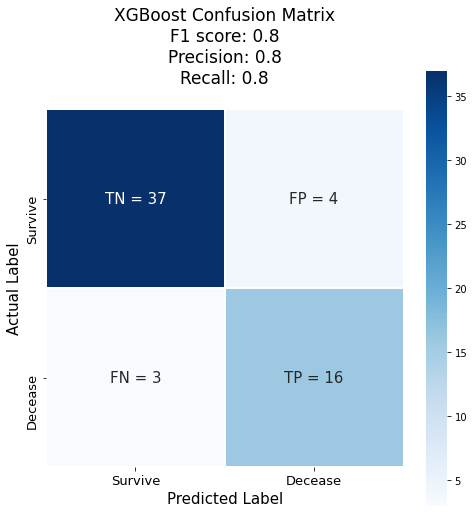

In [ ]:
#confusion matrix of xgboost model
xgb_cmatrix = confusion_matrix(y_test, xgb_ypred)

#pulling individual classification report scores
#each of these variables will return 2 values, 1 for each class --> the one we want is index 1 (predicted death by heart failure)
xgb_prec, xgb_recall, xgb_f1, xgb_supp = score(y_test, xgb_ypred)

#setting visualisations for confusion matrix
xgb_cmatrix_vis = []
for index, value in enumerate(xgb_cmatrix):
  if index == 0:
    xgb_cmatrix_vis.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
  if index == 1:
    xgb_cmatrix_vis.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])

#plot confusion matrix
plt.figure(figsize=(8, 8));

sns.heatmap(xgb_cmatrix, annot=np.array(xgb_cmatrix_vis), fmt='', 
            annot_kws={'size': 15}, linewidths=0.5, square=True, cmap='Blues', 
            xticklabels = ['Survive', 'Decease'], 
            yticklabels = ['Survive', 'Decease']
            );

plt.xlabel('Predicted Label', fontsize=15);
plt.ylabel('Actual Label', fontsize=15);
plt.title('XGBoost Confusion Matrix\n' + 
          'F1 score: {:.1f}'.format(xgb_f1[1]) + 
          '\nPrecision: {:.1f}'.format(xgb_prec[1]) + 
          '\nRecall: {:.1f}'.format(xgb_recall[1]) + '\n', 
          size=17
          );
plt.tick_params(labelsize=13);

plt.show();

<a name='conclusion-rec'></a>
## Conclusion and Recommendations

It was revealed during the EDA that many of the features in the original dataset, while originally thought to have a larger impact on the predictions, turned out to have very little correlation with our target variable, the death event. The features eventually chosen and used in the modelling were age, ejection fraction, serum creatine and time. These features were chosen as they had a correlation above an absolute value of 0.25 with the target variable.

The models were evaluated based on various metrics such as the F1 score, the Precision-Recall score and the Train/Test Accuracy. 

We prioritised finding the model with the highest F1 score since it is an indication of the model's accuracy on the dataset and performance as a whole. 

We also paid special attention to the Recall score. The reason for this is because Recall score is sensitive to the number of False Negatives, which in this project where we predict mortality by heart failure, is something that we want to reduce as much as possible. 

For False Negatives, what it essentially means is that we wrongly predicted that the patient's condition is not as severe and that they will survive, but in reality they actually succumbed to heart failure. This is a deadly misclassification as it might result in the patient not receiving earlier care and attention that may have potentially saved their life.

With this in mind, we paid special attention to get as high a Recall score as possible. 

Comparing the metrics, we found the XGBoost Classifier model to be the best performer with 82% F1 score, 84% Recall, 80% Precision, 86% Train Accuracy and 83% Test Accuracy. 

The model may serve as an aid for easier identification of the patients most at risk of mortality from heart failure and allow doctors and nurses to better focus their attention and allocate resources to the patients who needs it most.

Recommendations for the improvement of results include:
- Further tuning of hyperparameters to achieve more accurate predictions
- More rows of data to train model with since current dataset is relatively small
- More specific details on patients' underlying conditions like subtypes of diseases


Recomendations for further development beyond the current project include:
- Create a model that can reflect the severity of patients' conditions and generate likelihood of mortality from heart failure
- Apply model to predict other types of causes of deaths such stroke
